In [1]:
# !pip install --upgrade pip
# !pip install --upgrade scikit-learn==0.23.0

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

MNIST - датасет образцов рукописного написания цифр, является стандартом, предложенным Национальным институтом стандартов и технологий США с целью калибрации и сопоставления методов распознавания изображений с помощью машинного обучения. Образцы из набора NIST были нормализированы, прошли сглаживание и приведены к серому полутоновому изображению размером 28x28 пикселей. 

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

Первый элемент

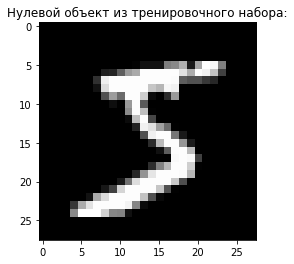

In [4]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

И его отклик

In [5]:
y_train[0]

5

Для разделения данных используем функцию train_test_split из библиотеки sklearn. Следующий код разделяет исходные данные в отношении 70/30.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)
X_train_old = X_train
X_test_old = X_test
y_train_old = y_train
y_test_old = y_test

Преобразуем данные

In [7]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)

Уменьшим размерность тестовых данных

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10, svd_solver='full')
modelPCA = pca.fit(X_train) 

X_train = modelPCA.transform(X_train)

Найдем долю объясненной дисперсии в зависимости от количества используемых ГК

In [25]:
# explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
explained_variance

array([0.19988926, 0.34475353, 0.47102049, 0.58168985, 0.68147315,
       0.76921533, 0.83591836, 0.89529587, 0.95156097, 1.        ])

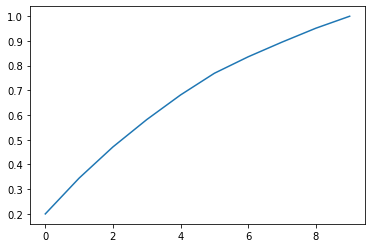

In [26]:
plt.plot(np.arange(10), explained_variance, ls = '-')

Подключаем библиотеку для обучения многоклассового классификатора методом One-vs-All и дерево принятия решений

In [11]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2020)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

Примените полученное ранее преобразование метода главных компонент к тестовым данным

In [13]:
len(X_test[0])

784

In [28]:
modelPCA = pca.fit(X_test) 
X_test = modelPCA.transform(X_test)

In [29]:
y_pred = clf.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

In [31]:
CM

array([[1462,    0,   42,   92,    3,   23,   31,   10,   30,    0],
       [   0, 1691,   35,    5,    1,    4,  201,  128,    7,    3],
       [  58,   10, 1014,   32,   65,   88,  400,   11,   82,    3],
       [  25,    6,   55, 1486,    9,  158,    7,   28,   78,   21],
       [   4,    7,   36,    4, 1377,   10,   38,   45,   23,  212],
       [  32,    1,  106,  346,   30,  721,   13,   68,  253,   21],
       [  23,   20,  848,   23,   20,   15,  652,   56,  107,    2],
       [  14,   44,    8,    2,   41,   41,   47, 1480,   16,  193],
       [  18,   21,   39,  108,   23,  326,   48,    8, 1135,   47],
       [  10,    2,    6,   40,  203,   42,   59,  138,   37, 1287]])

Число верно классифицирвоанных объектов класс 0

In [32]:
CM[0][0]

1462

Число объектов класс 0 отнесенных к классу 8

In [33]:
CM[0][8]

30

In [34]:
#Верно классифицированных пятерок:
CM[5][5]

721

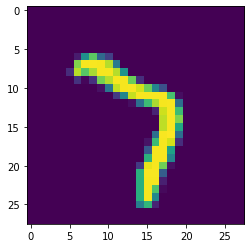

[0.04289354 0.         0.14613072 0.         0.         0.01292947
 0.55905083 0.         0.23899544 0.        ]


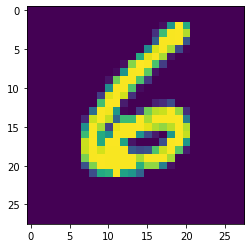

[0.00965213 0.         0.         0.79467522 0.         0.11716388
 0.         0.         0.         0.07850877]


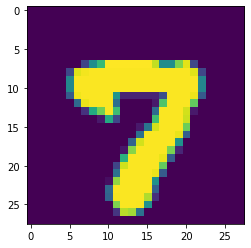

[0.         0.59231586 0.03643493 0.01317994 0.         0.01377903
 0.20221733 0.         0.07674918 0.06532374]


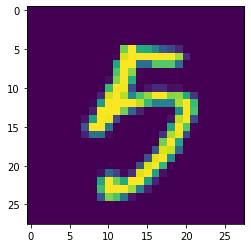

[0.         0.         0.         0.         0.18714707 0.00940213
 0.04452183 0.64670135 0.         0.11222763]


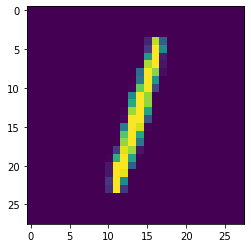

[0.1735982  0.         0.         0.11476515 0.         0.44801553
 0.         0.         0.26362112 0.        ]


In [35]:
# Вероятность отнесения 5 изображений:
numbers = np.random.randint(0, X_test.shape[0], 5)
images = X_test[numbers]
predictions = clf.predict_proba(images)
for i in range(len(numbers)):
    plt.imshow(X_train_old[numbers[i]])
    plt.show()
    print(predictions[i])

In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average=None)
rec = recall_score(y_test, y_pred, average=None)
f1s = f1_score(y_test, y_pred, average=None)
acc, pre, rec, f1s

(0.6836111111111111,
 array([0.88821385, 0.93840178, 0.46322522, 0.6950421 , 0.77708804,
        0.50490196, 0.43582888, 0.7505071 , 0.64196833, 0.71939631]),
 array([0.86355582, 0.81493976, 0.57515598, 0.7933796 , 0.78416856,
        0.4531741 , 0.36919592, 0.78472959, 0.64015792, 0.70559211]),
 array([0.87571129, 0.87232396, 0.51315789, 0.74096235, 0.78061224,
        0.4776416 , 0.39975475, 0.76723691, 0.64106185, 0.71242735]))